In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate

In [99]:
df_credits=pd.read_csv('tmdb_5000_credits.csv')

In [100]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [101]:
df_movies=pd.read_csv('tmdb_5000_movies.csv')

In [102]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [103]:
df_credits.columns=['id', 'title', 'cast', 'crew']

In [104]:
df_movies.drop(['title'], axis=1, inplace=True)

In [105]:
df_movielens=pd.merge(df_credits,df_movies,on='id')

In [106]:
df_movielens.head()

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


In [107]:
df_movielens.shape

(4803, 22)

# Demographic Recommender

In [108]:
df_movielens['vote_average'].mean()

6.092171559442016

In [109]:
df_movielens['vote_count'].quantile(q=0.9)

1838.4000000000015

In [110]:
df_filtered=df_movielens[df_movielens['vote_count']>df_movielens['vote_count'].quantile(q=0.9)]

In [111]:
df_filtered.shape

(481, 22)

In [112]:
def movie_score(x):
    v=x['vote_count']
    m=df_movielens['vote_count'].quantile(q=0.9)
    R=x['vote_average']
    C=df_movielens['vote_average'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

In [113]:
df_filtered['score']=df_filtered.apply(movie_score, axis=1)

In [114]:
df_highscore=df_filtered.sort_values(by='score', ascending=False).head(10)

In [115]:
df_highscore[['title', 'vote_count', 'vote_average', 'popularity', 'score']]

,title,vote_count,vote_average,popularity,score
1881,The Shawshank Redemption,8205,8.5,136.747729,8.059258
662,Fight Club,9413,8.3,146.757391,7.939256
65,The Dark Knight,12002,8.2,187.322927,7.920020
3232,Pulp Fiction,8428,8.3,121.463076,7.904645
96,Inception,13752,8.1,167.583710,7.863239
3337,The Godfather,5893,8.4,143.659698,7.851236
95,Interstellar,10867,8.1,724.247784,7.809479
809,Forrest Gump,7927,8.2,138.133331,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,123.630332,7.727243
1990,The Empire Strikes Back,5879,8.2,78.517830,7.697884


In [116]:
df_popular= df_movielens.sort_values('popularity', ascending=False).head(10)

In [117]:
df_popular[['title', 'vote_count', 'vote_average', 'popularity']]

,title,vote_count,vote_average,popularity
546,Minions,4571,6.4,875.581305
95,Interstellar,10867,8.1,724.247784
788,Deadpool,10995,7.4,514.569956
94,Guardians of the Galaxy,9742,7.9,481.098624
127,Mad Max: Fury Road,9427,7.2,434.278564
28,Jurassic World,8662,6.5,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,6985,7.5,271.972889
82,Dawn of the Planet of the Apes,4410,7.3,243.791743
200,The Hunger Games: Mockingjay - Part 1,5584,6.6,206.227151
88,Big Hero 6,6135,7.8,203.734590


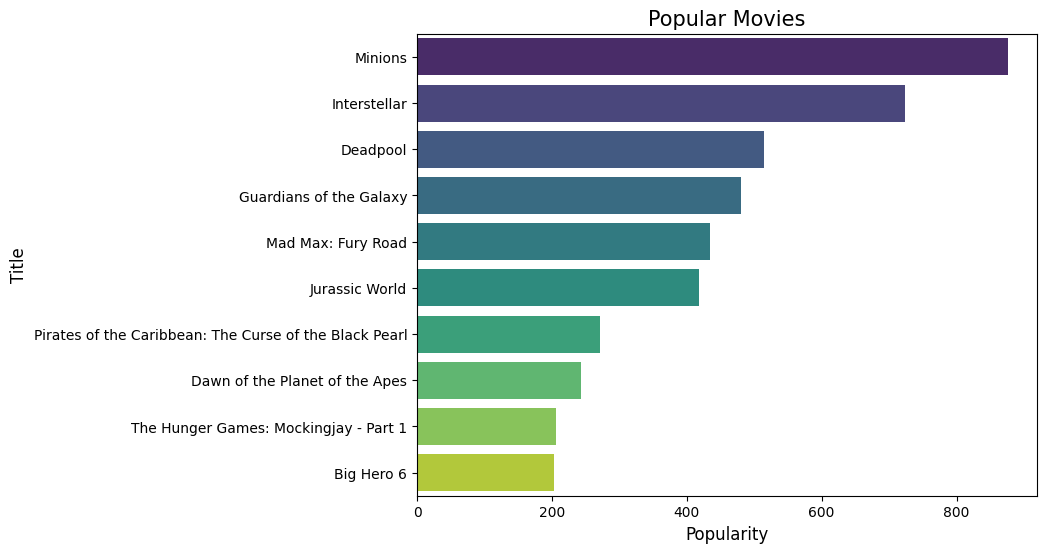

In [118]:
plt.figure(figsize=(8,6))
sns.barplot(y='title',x='popularity', data=df_popular, palette='viridis')
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Title", fontsize=12)
plt.title("Popular Movies", fontsize=15)
plt.show()

# Content Based Recommender System

In [119]:
df_movielens['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [120]:
df_movielens['overview'].isnull().sum()

3

In [121]:
df_movielens['overview'].fillna(' ', inplace=True)

In [122]:
tfidfv=TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix=tfidfv.fit_transform(df_movielens['overview'])
print(tfidfv_matrix.todense())
tfidfv_matrix.todense().shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(4803, 20978)

In [123]:
cosine_sim1 = linear_kernel(tfidfv_matrix, tfidfv_matrix)

In [124]:
cosine_sim1.shape

(4803, 4803)

In [125]:
indices=pd.Series(data=list(df_movielens.index), index= df_movielens['title'] )

In [126]:
indices.head()

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [127]:
# Function that takes in movie title as input and outputs most similar movies
def content_recommendations(title, cosine_sim):

    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores=sim_scores[1:11]

    # Get the movie indices
    ind=[]
    for (x,y) in sim_scores:
        ind.append(x)

    # Return the top 10 most similar movies
    tit=[]
    for x in ind:
        tit.append(df_movielens.iloc[x]['title'])
    return pd.Series(data=tit, index=ind)

In [128]:
content_recommendations('The Dark Knight Rises',cosine_sim1)

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
dtype: object

In [129]:
content_recommendations('The Avengers',cosine_sim1)

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
dtype: object

In [130]:
type(df_movielens['cast'].iloc[0])

str

In [131]:
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df_movielens[feature] = df_movielens[feature].apply(literal_eval)

In [132]:
type(df_movielens['cast'].iloc[0])

list

In [133]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for a in x:
        if a['job']=='Director':
            return a['name']
    return 'NaN'

In [134]:
# Get the list top 3 elements or entire list; whichever is more in cast, genres and keywords columns.
def get_top3(x):
    new=[]
    for a in x[:3]:
        new.append(a['name'])
    return new
#Return empty list in case of missing/malformed data
    return []

In [135]:
df_movielens['director']=df_movielens['crew'].apply(lambda x: get_director(x))

In [136]:
df_movielens['actor']=df_movielens['cast'].apply(lambda x:get_top3(x))

In [137]:
df_movielens['genres']=df_movielens['genres'].apply(lambda x:get_top3(x))

In [138]:
df_movielens['keywords']=df_movielens['keywords'].apply(lambda x:get_top3(x))

In [139]:
df_movielens[['title', 'actor', 'director', 'keywords', 'genres']].head()

,title,actor,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [140]:
def clean_director(x):
    return x.lower().replace(' ','')

In [141]:
def clean_top3(x):
    new=[]
    for a in x:
        new.append(a.lower().replace(' ',''))
    return new

In [142]:
df_movielens['director']=df_movielens['director'].apply(lambda x: clean_director(x))

In [143]:
df_movielens['actor']=df_movielens['actor'].apply(lambda x:clean_top3(x))

In [144]:
df_movielens['keywords']=df_movielens['keywords'].apply(lambda x:clean_top3(x))

In [145]:
df_movielens['genres']=df_movielens['genres'].apply(lambda x:clean_top3(x))

In [146]:
df_movielens[['title', 'actor', 'director', 'keywords', 'genres']].head(3)

,title,actor,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"


In [147]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['actor']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [148]:
df_movielens['soup'] = df_movielens.apply(create_soup, axis=1)

In [149]:
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df_movielens['soup'])

In [150]:
cosine_sim2 = cosine_similarity(cv_matrix, cv_matrix)

In [151]:
content_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
dtype: object

In [152]:
content_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
2649           The Son of No One
1525              Apocalypse Now
4638    Amidst the Devil's Wings
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
dtype: object

# Collaborative Recommender

In [153]:
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate

In [154]:
df_rating= pd.read_csv('ratings_small.csv')
df_rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [155]:
# We will use the famous SVD algorithm.
svd = SVD()

In [156]:
reader = Reader()

In [157]:
data = Dataset.load_from_df(df_rating[['userId', 'movieId', 'rating']], reader)

In [158]:
# Run 5-fold cross-validation and print the results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8922  0.8988  0.8936  0.9025  0.8966  0.8967  0.0037  
MAE (testset)     0.6862  0.6930  0.6896  0.6933  0.6905  0.6905  0.0026  
Fit time          4.03    2.08    1.41    1.39    2.63    2.31    0.98    
Test time         0.45    0.11    0.11    0.12    0.25    0.21    0.13    


{'test_rmse': array([0.89224892, 0.89878569, 0.89355751, 0.90252264, 0.89657213]),
 'test_mae': array([0.68621017, 0.69304056, 0.68961849, 0.69326193, 0.69053301]),
 'fit_time': (4.025737285614014,
  2.083665370941162,
  1.408029556274414,
  1.3883397579193115,
  2.626249313354492),
 'test_time': (0.44755125045776367,
  0.11197614669799805,
  0.1125638484954834,
  0.11870431900024414,
  0.24833941459655762)}

In [159]:
#sample full trainset
trainset = data.build_full_trainset()

In [160]:
# Train the algorithm on the trainset
svd.fit(trainset)

In [161]:
df_rating[df_rating['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [162]:
# predict ratings for the testset
svd.predict(uid=1, iid=302, r_ui=None)

Prediction(uid=1, iid=302, r_ui=None, est=2.5773377863008826, details={'was_impossible': False})

In [163]:
# directly grab the estimated ratings for the testset
svd.predict(uid=1, iid=302, r_ui=None).est

2.5773377863008826

# Hybrid Recommender

In [164]:
df_movielens.columns=['movieId', 'title', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'vote_average', 'vote_count', 'director', 'actor', 'soup']

In [165]:
def hybrid_recommendations(userId, title):

    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores=sim_scores[1:11]

    # Get the movie indices
    ind=[]
    for (x,y) in sim_scores:
        ind.append(x)

    # Grab the title,movieid,vote_average and vote_count of the top 10 most similar movies
    tit=[]
    movieid=[]
    vote_average=[]
    vote_count=[]
    for x in ind:
        tit.append(df_movielens.iloc[x]['title'])
        movieid.append(df_movielens.iloc[x]['movieId'])
        vote_average.append(df_movielens.iloc[x]['vote_average'])
        vote_count.append(df_movielens.iloc[x]['vote_count'])


    # Predict the ratings a user might give to these top 10 most similar movies
    est_rating=[]
    for a in movieid:
        est_rating.append(svd.predict(userId, a, r_ui=None).est)

    return pd.DataFrame({'index': ind, 'title':tit, 'movieId':movieid, 'vote_average':vote_average, 'vote_count':vote_count,'estimated_rating':est_rating}).set_index('index').sort_values(by='estimated_rating', ascending=False)

In [166]:
hybrid_recommendations(1,'Avatar')

,title,movieId,vote_average,vote_count,estimated_rating
index,,,,,
5,Spider-Man 3,559,5.9,3576,2.937753
103,The Sorcerer's Apprentice,27022,5.8,1470,2.805287
1,Pirates of the Caribbean: At World's End,285,6.9,4500,2.730602
206,Clash of the Titans,18823,5.6,2233,2.718531
786,The Monkey King 2,381902,6.0,24,2.718531
131,G-Force,19585,5.1,510,2.718531
715,The Scorpion King,9334,5.3,779,2.718531
215,Fantastic 4: Rise of the Silver Surfer,1979,5.4,2589,2.550612
466,The Time Machine,2135,5.8,631,2.439707


In [167]:
hybrid_recommendations(1,'Avatar')

,title,movieId,vote_average,vote_count,estimated_rating
index,,,,,
5,Spider-Man 3,559,5.9,3576,2.937753
103,The Sorcerer's Apprentice,27022,5.8,1470,2.805287
1,Pirates of the Caribbean: At World's End,285,6.9,4500,2.730602
206,Clash of the Titans,18823,5.6,2233,2.718531
786,The Monkey King 2,381902,6.0,24,2.718531
131,G-Force,19585,5.1,510,2.718531
715,The Scorpion King,9334,5.3,779,2.718531
215,Fantastic 4: Rise of the Silver Surfer,1979,5.4,2589,2.550612
466,The Time Machine,2135,5.8,631,2.439707


In [168]:
content_recommendations('Avatar', cosine_sim2)

206                         Clash of the Titans
71        The Mummy: Tomb of the Dragon Emperor
786                           The Monkey King 2
103                   The Sorcerer's Apprentice
131                                     G-Force
215      Fantastic 4: Rise of the Silver Surfer
466                            The Time Machine
715                           The Scorpion King
1      Pirates of the Caribbean: At World's End
5                                  Spider-Man 3
dtype: object

# Conclusion
We built four different recommendation engines based on different ideas and algorithms. They are as follows:

1.**Demographic Recommender**: This system used the overall Vote Count and Vote Averages to build Top Movies Charts, in general and for a specific genre. The IMDB Weighted Rating System was used to calculate ratings on which the sorting was finally performed.


2.**Content-Based Recommender:** We built two content-based engines; one that took movie overview as input and the other took metadata such as cast, crew, genre and keywords to come up with predictions.


**3.Collaborative Filtering:** We used the powerful Surprise Library to build a collaborative filter based on single value decomposition. The RMSE obtained was less than 1 and the engine gave estimated ratings for a given user and movie.


**4.Hybrid Engine:** We combined content-based and collaborative filtering to build an engine that gave movie suggestions to a particular user who liked a particular movie based on the estimated ratings that had been internally calculated for that user as well as the similarities between movies. While Demographic Filtering is very elementary and cannot be used practically, Hybrid Systems can take advantage of both Content-Based and Collaborative filtering and make reliable predictions.